In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [3]:
# copy demo into current directory
ac.copydemo('snh')

# compute the homoclinic orbit h^1_b using homotopy and HomCont
# (contents of h1b.auto)
runner = ra.runAUTO()
print("\n1st run - homotopy backwards in time from equilibrium b : x=y=0, phi=acos(-0.5*nu2)")
r1 = ac.run(e='snh',ICP=['T','omega'],NDIM=3,ILP=0,ITNW=7,IPS=9,ISTART=3,IEQUIB=-2,
         PAR={'nu1':0.5,'nu2':-1.88},NPAR=26,
         UZSTOP={'omega':0},DS=-0.01,
         unames={1:'xgamma',2:'ygamma',3:'phigamma'},
         parnames={1:'nu1',2:'nu2',3:'d',11:'T',20:'omega'}, runner=runner)

print("\n2nd run - improve connection")
r2 = ac.run(r1('UZ1'),ICP=['T','nu1'],DSMAX=10,UZSTOP={'T':-2000}, runner=runner)

print("\n3rd run - follow connection forwards and backwards")
st = ac.load(r2('UZ1'),ICP=['nu1','nu2'],
             IEQUIB=1,ISTART=1,DSMIN=1e-9,DS=-0.005,DSMAX=0.005, runner=runner)
r3 = ac.merge( ac.run(st,UZSTOP={},ILP=1,STOP=['LP20'],NTST=200, runner=runner) +
           ac.run(st,UZSTOP={'nu2':-1.999},NTST=50,DS='-', runner=runner) )
ac.save(r3,'h1b')
ac.clean()

Copying demo snh ... done

1st run - homotopy backwards in time from equilibrium b : x=y=0, phi=acos(-0.5*nu2)
gfortran -fopenmp -O -c snh.f90 -o snh.o
gfortran -fopenmp -O snh.o -o snh.exe /auto/lib/*.o
Starting snh ...

  BR    PT  TY  LAB       T          L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma     omega     
   1     1  EP    1  -1.00000E-01   7.61820E-01  -7.59560E-05  -9.35735E-05   7.62473E-01  -6.27446E+00
   1   142  UZ    2  -9.32560E+00   3.33201E+00   2.15992E-01   8.81725E-01   6.63135E+00  -1.44376E-07

 Total Time    0.377E+00
snh ... done

2nd run - improve connection
Starting snh ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB       T          L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma      nu1      
   1   439  UZ    3  -2.00000E+03   6.61957E+00   4.29369E-01   6.63919E-01   6.63135E+00   5.46452E-01

 Total Time    0.853E+00
snh ... done

3rd run - follow connection forwards and backwards
Runner configured
Starting snh ...

  BR    PT  TY  LAB      nu1         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma      nu2      


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   1    15  LP    4   5.45003E-01   6.66122E+00   4.89671E-01   6.94325E-01   6.67317E+00  -1.84983E+00
   1   175  LP    5   7.26954E-01   7.00645E+00   8.07822E-01   6.68592E-01   7.02710E+00  -1.47165E+00
   1   181  LP    6   7.26530E-01   7.00314E+00   6.78156E-01   5.94957E-01   7.02442E+00  -1.47527E+00
   1   198  LP    7   7.35540E-01   7.00941E+00   8.93253E-01   7.21264E-01   7.03319E+00  -1.46337E+00
   1   208  LP    8   7.32948E-01   7.00284E+00   6.43197E-01   6.85496E-01   7.02782E+00  -1.47067E+00
   1   222  LP    9   7.39280E-01   7.00846E+00   9.20145E-01   7.40774E-01   7.03561E+00  -1.46007E+00
   1   234  LP   10   7.35579E-01   7.00087E+00   6.34162E-01   7.52418E-01   7.02938E+00  -1.46856E+00
   1   247  LP   11   7.40976E-01   7.00607E+00   9.30764E-01   7.49081E-01   7.03668E+00  -1.45861E+00
   1   259  LP   12   7.36768E-01   6.99810E+00   6.30774E-01   7.78202E-01   7.03010E+00  -1.46758E+00
   1   272  LP   13   7.41773E-01   7.00306E+00   9.35366E-01   

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB      nu1         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma      nu2      
   1    97  UZ    4   6.40374E-01   6.30401E+00   2.00045E-01   4.08624E-01   6.31481E+00  -1.99900E+00

 Total Time    0.401E+00
snh ... done
Merge done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Saving to b.h1b, s.h1b, and d.h1b ... done
Deleting fort.* *.o *.exe *.*~ ... done


In [6]:
# compute the codimension-one PtoE connection via Lin's method
# contents of cb.auto
runner = ra.runAUTO()

print("\n1st run - find and continue equilibrium a : x=y=0, phi=-acos(-0.5*nu2)")
# [ b would be x=y=0, phi=acos(-0.5*nu2) ]
r1 = ac.run(e='snh',ICP=['nu1'],NDIM=3,ILP=0,ITNW=7,ITMX=20,IPS=1,
         UZR={},PAR={},STOP=['HB1'],DS=0.1,DSMAX=1.0,NPAR=26,
         unames={1:'xgamma',2:'ygamma',3:'phigamma',4:'x',5:'y',6:'phi',
                 7:'x-',8:'y-',9:'phi-',10:'x+',11:'y+',12:'phi+'},
         parnames={1:'nu1',2:'nu2',3:'d',
                   5:'delta',6:'eps',7:'mu',8:'h',9:'T-',10:'T+',11:'T',
                   21:'sigma-',22:'sigma+',23:'eta',24:'Zx',25:'Zy',26:'Zz'},runner=runner)

print("\n2nd run - switch to the periodic orbit and continue in nu1 up to 0.74")
r2 = ac.run(r1('HB1'),ICP=['nu1','T'],IPS=2,NTST=100,
         STOP=[],UZSTOP={'nu1':0.74},DSMAX=0.1, runner=runner)

print("\n3rd run - extend the system")
r3 = ac.run(r2('UZ1'),ICP=['mu','h','T'],IPS=4,NDIM=6,NBC=7,NINT=1,
         STOP=['BP1'],UZSTOP={},DSMAX=1, runner=runner)

print("\n4th run - normalize the Floquet bundle")
print("also put a starting value into sigma- (which")
print("measures the distance to Sigma = { phi=pi })")
r4 = ac.run(r3('BP1'),ISW=-1,
         STOP=[],UZSTOP={'h':1.0},DSMAX=100, runner=runner)

print("\n5th run - integrate away from the periodic orbit, UZ points denote")
print(" intersections with Sigma")
r5 = ac.run(r4('UZ1'),ISW=0,ICP=['T-','mu','T','sigma-'],NDIM=9,NBC=11,
         UZSTOP={'sigma-':0},DS=1.0, runner=runner)

print("\n6th run - integrate backwards from the equilibrium b : x=y=0, phi=acos(-0.5*nu2)")
print("up to Sigma + put starting data for Lin vector and Lin gap in Zx, Zy, Zz, and eta.")
r6 = ac.run(r5('UZ1'),ICP=['T+','sigma+','T-','mu','T'],NDIM=12,NBC=15,NPR=10,
         UZSTOP={'sigma+':0}, runner=runner )

print("\n7th run - close the gap (with some intermediate solutions)")
r7 = ac.run(r6('UZ1'),ICP=['eta','nu1','delta','eps','T+','T-','mu','T'],
         NBC=17,NINT=2,NPR=5,THL={'T':0,'T-':0,'T+':0},
         UZSTOP={'eta':0},DS=-0.01,DSMAX=0.01, runner=runner)
ac.save(r7,'closegap')

print("\n8th run - keep the gap closed and continue in nu1,nu2")
start8 = ac.load(r7('UZ1'),ICP=['nu1','mu','delta','eps','nu2','T+','T-','T'],
              UZSTOP={},ILP=1,NPR=100,ISP=0,DS=0.1,DSMAX=0.1, runner=runner)
r8 = ac.merge( ac.run(start8,UZSTOP={'delta':-3e-3}, runner=runner) 
           + ac.run(start8,DS='-',STOP=['LP1'], runner=runner) )
ac.save(r8,'cb')


1st run - find and continue equilibrium a : x=y=0, phi=-acos(-0.5*nu2)
Starting snh ...

  BR    PT  TY  LAB      nu1         L2-NORM        xgamma        ygamma       phigamma   
   1     1  EP    1   0.00000E+00   5.53071E+00   0.00000E+00   0.00000E+00   5.53071E+00
   1     4  HB    2   6.83447E-01   5.53071E+00  -4.34009E-30   1.38149E-30   5.53071E+00

 Total Time    0.947E-01
snh ... done

2nd run - switch to the periodic orbit and continue in nu1 up to 0.74
Starting snh ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB      nu1         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma       T       
   2     5  UZ    3   7.40000E-01   5.65209E+00   3.73559E-01   3.74499E-01   5.64003E+00   6.28320E+00

 Total Time    0.227E+00
snh ... done

3rd run - extend the system
Starting snh ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB       mu         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma     MAX x           h             T       
   2    10  BP    4   6.46417E+00   5.65209E+00   3.73563E-01   3.74510E-01   5.64003E+00   0.00000E+00   0.00000E+00   6.28320E+00

 Total Time    0.176E+00
snh ... done

4th run - normalize the Floquet bundle
also put a starting value into sigma- (which
measures the distance to Sigma = { phi=pi })
Starting snh ...

  BR    PT  TY  LAB       mu         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma     MAX x           h             T       
   3     9  UZ    5   6.46417E+00   5.73980E+00   3.73559E-01   3.74509E-01   5.64003E+00   2.20950E-01   1.00000E+00   6.28320E+00

 Total Time    0.193E+00
snh ... done

5th run - integrate away from the periodic orbit, UZ points denote
 intersections with Sigma
Starting snh ...

  BR    PT  TY  LAB       T-         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma       mu            T           sigma-   

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB      nu1         L2-NORM          mu          delta          eps           nu2            T+            T-      
   3    51  LP   13   6.86499E-01   8.27135E+00   1.50336E+00  -9.13507E-03   4.60057E-06  -1.54905E+00   9.89943E+00   1.15339E+01

 Total Time    0.516E+00
snh ... done
Merge done
Saving to b.cb, s.cb, and d.cb ... done


In [9]:
# compute the codimension-zero PtoE connection and tangency using homotopy
# (contents of tb.auto)

runner = ra.runAUTO()
print("\n1st run - find and continue equilibrium a : x=y=0, phi=-acos(-0.5*nu2)")
# [ b would be x=y=0, phi=acos(-0.5*nu2) ]
r1 = ac.run(e='snh',ICP=['nu1'],NDIM=3,ILP=0,ITNW=7,ITMX=10,
         STOP=['HB1'],DS=0.1,DSMAX=1.0,DSMIN=1e-4,NPAR=26,
         unames={1:'xgamma',2:'ygamma',3:'phigamma',4:'x',5:'y',6:'phi',
                 7:'x-',8:'y-',9:'phi-'},
         parnames={1:'nu1',2:'nu2',3:'d',4:'codim',
                   5:'delta',6:'eps',7:'mu',8:'h',9:'T-',10:'T+',11:'T',
                   21:'sigma-'}, runner=runner)

print("\n2nd run - switch to the periodic orbit and continue in nu1 up to 0.74")
r2 = ac.run(r1('HB1'),ICP=['nu1','T'],IPS=2,NTST=100,
         STOP=[],UZSTOP={'nu1':0.74},DSMAX=0.1, runner=runner)

print("\n3rd run - extend the system")
r3 = ac.run(r2('UZ1'),ICP=['mu','h','T'],IPS=4,NDIM=6,NBC=7,NINT=1,
         STOP=['BP1'],UZSTOP={},DS=-0.1,DSMAX=1, runner=runner)

print("\n4th run - normalize the Floquet bundle")
r4 = ac.run(r3('BP1'),ISW=-1,DS=0.1,
         STOP=[],UZSTOP={'h':1.0},DSMAX=100, runner=runner)

print("\n5th run - integrate away from the periodic orbit in negative time.")
print("puts a starting value into sigma- (which measures the distance to W^u(b))")
print("UZ points denote intersections with W^u(b)")
r5 = ac.run(r4('UZ1'),ISW=0,ICP=['T-','mu','T','sigma-'],NDIM=9,NBC=11,
         PAR={'delta':1e-4,'codim':0},UZSTOP={'sigma-':0},DS=-1.0, runner=runner)

print("\n6th run - improve the connection")
r6 = ac.run(r5('UZ1'),ICP=['T-','mu','T','delta'],
         THL={'T':0,'T-':0},UZSTOP={'T-':-200}, runner=runner)

print("\n7th run - find folds (tangencies of codimension-zero connection)")
r7 = ac.run(r6('UZ1'),ICP=['nu1','mu','T','delta','T-'],NINT=2,ILP=1,
         STOP=['LP2'],UZSTOP={},DS=-0.1,DSMAX=0.1, runner=runner)

print("\n8th run - continue left fold (t_b)")
t = ac.run(r7('LP1'),ICP=['nu1','T','delta','nu2','T-','mu'],ISW=2,ISP=0,ITMX=20,
        STOP=['LP1'], runner=runner)
r8 = ac.merge( ac.run(t, runner=runner) + ac.run(t,DS='-', runner=runner) )

print("\n9th run - continue right fold (t_b)")
t = ac.run(r7('LP2'),ICP=['nu1','T','delta','nu2','T-','mu'],ISW=2,ISP=0,
        STOP=['LP1'], runner=runner)
r9 = ac.merge( ac.run(t, runner=runner) + ac.run(t,DS='-', runner=runner) )

ac.save( ac.relabel(r8+r9),'tb')

ac.clean()

ac.copy('cb','all')
ac.append('h1b','all')
ac.append('tb','all')
ac.relabel('all')

ac.clean()



1st run - find and continue equilibrium a : x=y=0, phi=-acos(-0.5*nu2)
Starting snh ...

  BR    PT  TY  LAB      nu1         L2-NORM        xgamma        ygamma       phigamma   
   1     1  EP    1   0.00000E+00   5.53071E+00   0.00000E+00   0.00000E+00   5.53071E+00
   1     4  HB    2   6.83447E-01   5.53071E+00  -4.34009E-30   1.38149E-30   5.53071E+00

 Total Time    0.857E-01
snh ... done

2nd run - switch to the periodic orbit and continue in nu1 up to 0.74
Starting snh ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB      nu1         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma       T       
   2     5  UZ    3   7.40000E-01   5.65209E+00   3.73559E-01   3.74499E-01   5.64003E+00   6.28320E+00

 Total Time    0.198E+00
snh ... done

3rd run - extend the system
Starting snh ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB       mu         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma     MAX x           h             T       
   2     4  BP    4  -6.83886E-01   5.65209E+00   3.73563E-01   3.74510E-01   5.64003E+00   0.00000E+00   0.00000E+00   6.28320E+00

 Total Time    0.187E+00
snh ... done

4th run - normalize the Floquet bundle
Starting snh ...

  BR    PT  TY  LAB       mu         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma     MAX x           h             T       
   3     9  UZ    5  -6.83892E-01   5.74109E+00   3.73563E-01   3.74510E-01   5.64003E+00   8.68630E-01   1.00000E+00   6.28320E+00

 Total Time    0.219E+00
snh ... done

5th run - integrate away from the periodic orbit in negative time.
puts a starting value into sigma- (which measures the distance to W^u(b))
UZ points denote intersections with W^u(b)
Starting snh ...

  BR    PT  TY  LAB       T-         L2-NORM      MAX xgamma    MAX ygamma   MAX phigamma       mu            T           sigma-  

Created plot


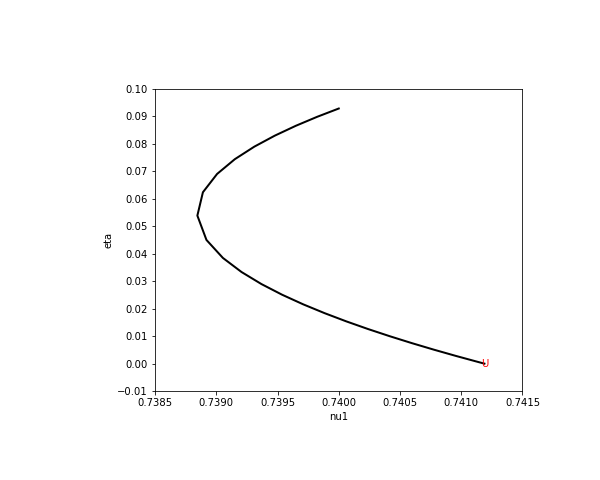

Created plot


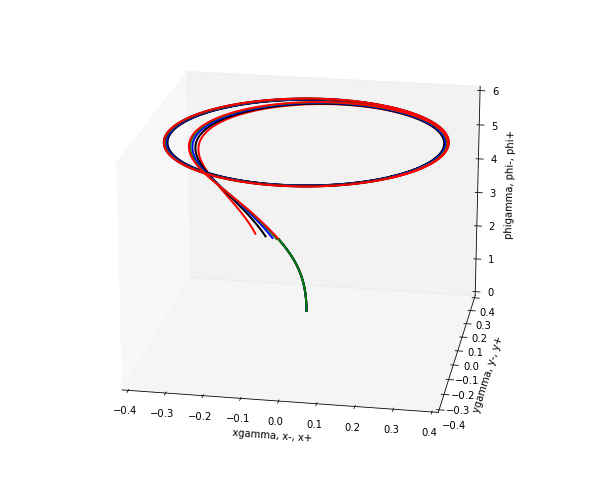

In [16]:
# plots of closing Lin gap to obtain point-cycle connection

# gap size eta vs nu1
p = ac.plot('closegap')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='nu1', bifurcation_y='eta')
p.savefig('b.png')
display(Image.open('b.png'))

# orbit segments for closure of Lin gap
p = ac.plot('closegap')
p.config(type='solution')
p.config(grid=False)
p.config(label=list(range(8,13)))
p.config(azimuth=-80, elevation=20)
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


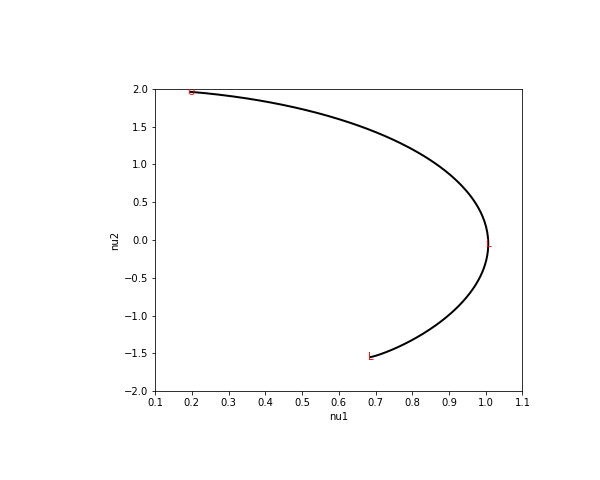

Created plot


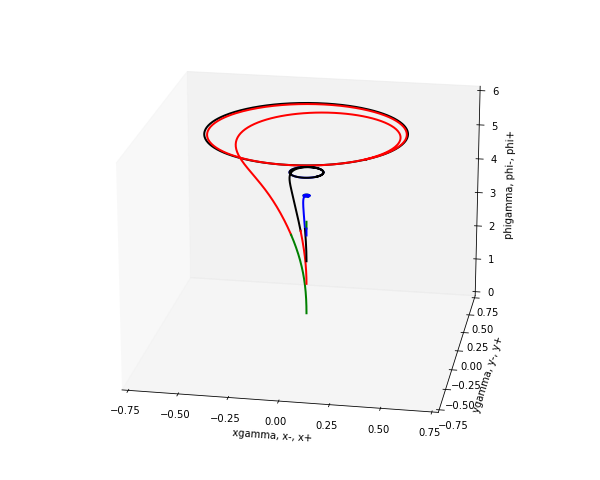

In [17]:
# connection continued in nu1 and nu2

# parameter nu2 vs nu1
p = ac.plot('cb')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='nu1', bifurcation_y='nu2')
p.savefig('b.png')
display(Image.open('b.png'))

# corresponding orbit segments
p = ac.plot('cb')
p.config(type='solution')
p.config(grid=False)
p.config(label=list(range(13,17)))
p.config(azimuth=-80, elevation=20)
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


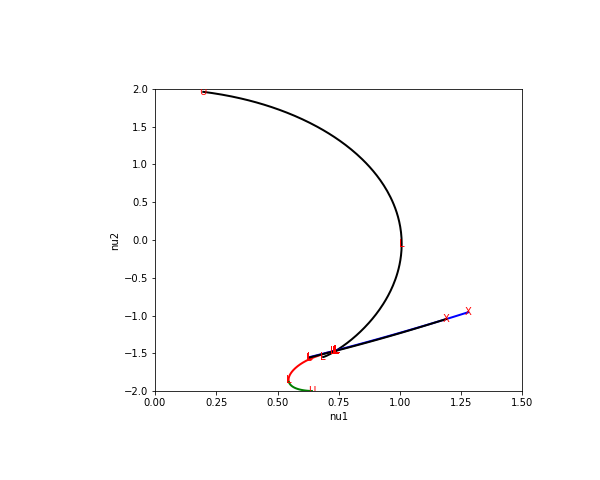

Created plot


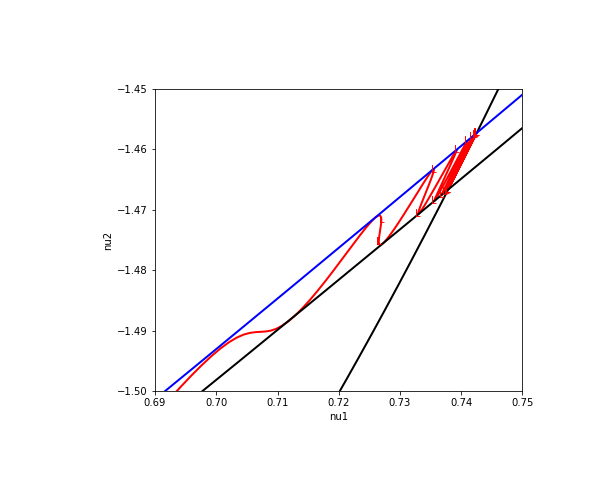

Created plot


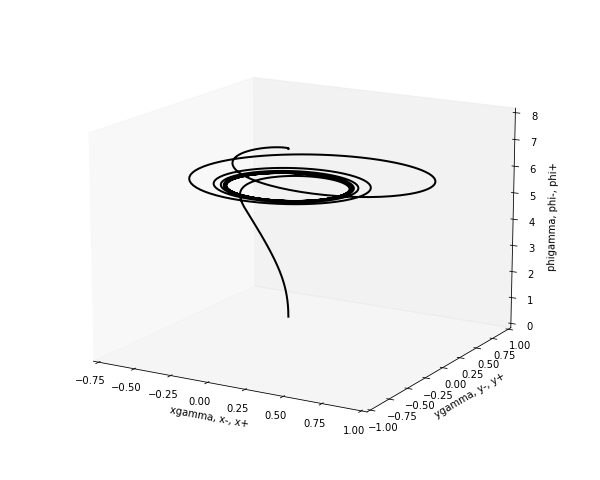

In [21]:
# snaking cuve h_1^b for label 20

# parameter nu2 vs nu1
p = ac.plot('all')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='nu1', bifurcation_y='nu2')
p.savefig('b.png')
display(Image.open('b.png'))

# parameter nu2 vs nu1 (zoom in on region of interest)
p = ac.plot('all')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='nu1', bifurcation_y='nu2')
p.config(minx=0.69, maxx = 0.75, miny = -1.50, maxy = -1.45)
p.savefig('b.png')
display(Image.open('b.png'))

# orbit segments for closure of Lin gap
p = ac.plot('all')
p.config(type='solution')
p.config(grid=False)
p.config(label=[20])
p.config(azimuth=-60, elevation=15)
p.savefig('b.png')
display(Image.open('b.png'))

In [22]:
# clean up files

for suffix in ['closegap','cb','tb','h1b','all']:
    ac.delete(suffix)
ac.clean()

Deleting b.closegap ... done
Deleting s.closegap ... done
Deleting d.closegap ... done
Deleting b.cb ... done
Deleting s.cb ... done
Deleting d.cb ... done
Deleting b.tb ... done
Deleting s.tb ... done
Deleting d.tb ... done
Deleting b.h1b ... done
Deleting s.h1b ... done
Deleting d.h1b ... done
Deleting b.all ... done
Deleting s.all ... done
Deleting d.all ... done
Deleting fort.* *.o *.exe *.*~ ... done
